## Data Loading

In [58]:
import pandas as pd
import seaborn as sns
import missingno as msno
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
df = pd.read_csv("/content/TMDB_movie_dataset_v11.csv")

In [60]:
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


## Data Preprocessing


###1.Check Missing Values###

<Axes: >

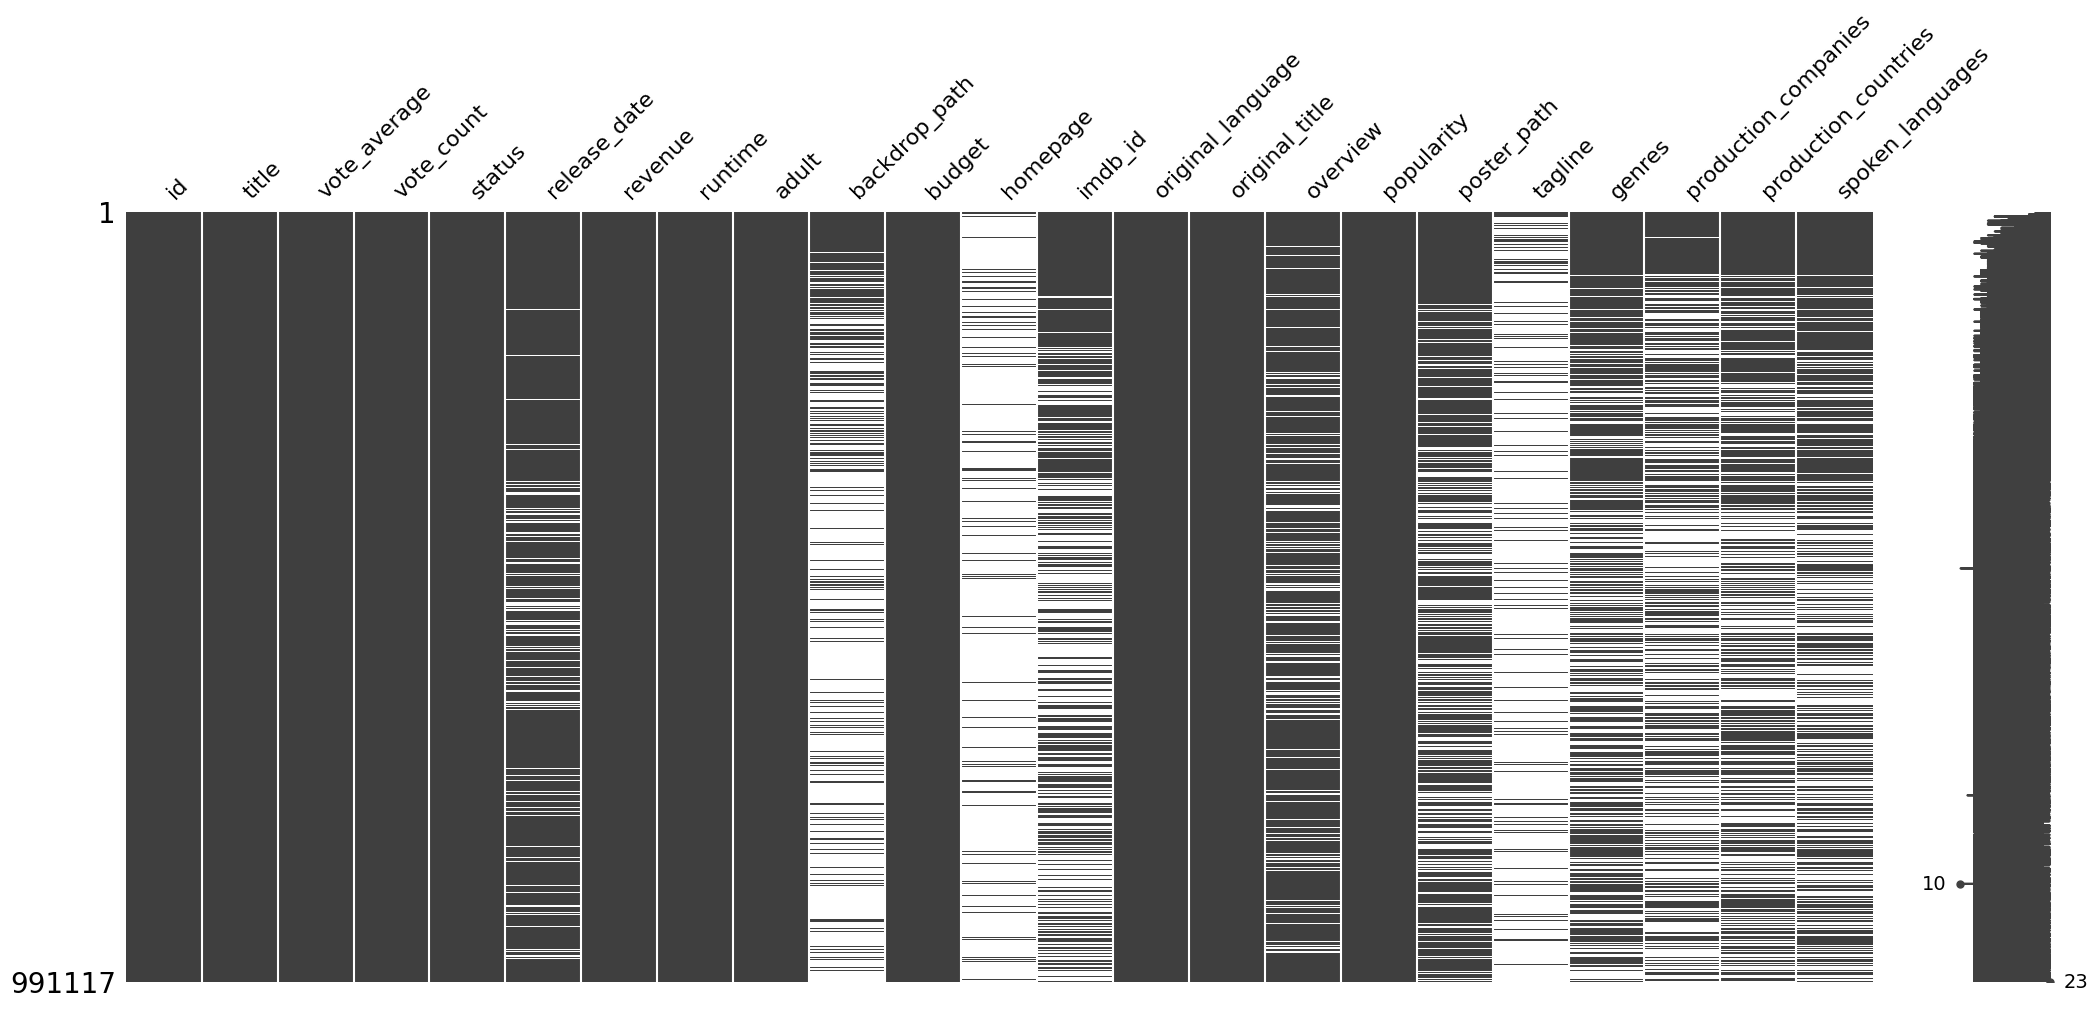

In [61]:
# Plot the msno
msno.matrix(df)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991117 entries, 0 to 991116
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    991117 non-null  int64  
 1   title                 991105 non-null  object 
 2   vote_average          991117 non-null  float64
 3   vote_count            991117 non-null  int64  
 4   status                991117 non-null  object 
 5   release_date          881301 non-null  object 
 6   revenue               991117 non-null  int64  
 7   runtime               991117 non-null  int64  
 8   adult                 991117 non-null  bool   
 9   backdrop_path         283069 non-null  object 
 10  budget                991117 non-null  int64  
 11  homepage              107490 non-null  object 
 12  imdb_id               569150 non-null  object 
 13  original_language     991117 non-null  object 
 14  original_title        991105 non-null  object 
 15  

In [63]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,9.911170e+05,991117.000000,991117.000000,9.911170e+05,991117.000000,9.911170e+05,991117.000000
mean,6.559980e+05,2.121711,21.636923,7.503020e+05,50.807851,2.954670e+05,1.362186
std,3.513912e+05,3.117200,341.005121,1.814011e+07,62.310814,5.162652e+06,8.115336
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,-28.000000,0.000000e+00,0.000000
25%,3.672280e+05,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.600000
50%,6.574980e+05,0.000000,0.000000,0.000000e+00,30.000000,0.000000e+00,0.600000
75%,9.620910e+05,5.000000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.920000
max,1.242932e+06,10.000000,34495.000000,3.000000e+09,14400.000000,9.000000e+08,2994.357000


###2.Drop Unused Columns###

In [64]:
# Drop unused columns
df = df.drop(['id', 'revenue', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'poster_path', 'original_title', 'tagline', 'production_companies', 'spoken_languages'], axis=1)
df.head(5)

,title,vote_average,vote_count,status,release_date,runtime,adult,original_language,overview,popularity,genres,production_countries
0,Inception,8.364,34495,Released,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America"
1,Interstellar,8.417,32571,Released,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America"
2,The Dark Knight,8.512,30619,Released,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America"
3,Avatar,7.573,29815,Released,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom"
4,The Avengers,7.710,29166,Released,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America


###3.Drop Null Values###

In [65]:
# Drop null values
df = df.dropna()
df

,title,vote_average,vote_count,status,release_date,runtime,adult,original_language,overview,popularity,genres,production_countries
0,Inception,8.364,34495,Released,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America"
1,Interstellar,8.417,32571,Released,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America"
2,The Dark Knight,8.512,30619,Released,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America"
3,Avatar,7.573,29815,Released,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom"
4,The Avengers,7.710,29166,Released,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...
991083,Sangin,0.000,0,Released,2019-04-04,19,False,en,Two lives collide and are changed forever in a...,0.840,"Drama, War",United States of America
991093,Dastaan-E-Miri Piri,0.000,0,Released,2019-05-30,103,False,pa,"In 1606, after Shri Guru Arjun Dev's sacrifice...",0.600,"Animation, Drama",India
991098,Verta käsissämme,0.000,0,Released,1958-11-21,83,False,fi,After returning home from being a prisoner of ...,0.841,Drama,Finland
991108,The Orientals,0.000,0,Released,1960-04-08,110,False,en,"Episodic, globe-trotting quasi-mondo focused o...",0.627,"Action, Adventure, Drama",Italy


###4.Split 'Date' Column###

In [66]:
# Replace release_date with year and month respectively
df['year']=df['release_date'].str[:4]
df['month']=df['release_date'].str[5:7]
df.drop('release_date', axis=1, inplace=True)
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,Inception,8.364,34495,Released,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America",2010,07
1,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
2,The Dark Knight,8.512,30619,Released,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",2008,07
3,Avatar,7.573,29815,Released,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",2009,12
4,The Avengers,7.710,29166,Released,143,False,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America,2012,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991083,Sangin,0.000,0,Released,19,False,en,Two lives collide and are changed forever in a...,0.840,"Drama, War",United States of America,2019,04
991093,Dastaan-E-Miri Piri,0.000,0,Released,103,False,pa,"In 1606, after Shri Guru Arjun Dev's sacrifice...",0.600,"Animation, Drama",India,2019,05
991098,Verta käsissämme,0.000,0,Released,83,False,fi,After returning home from being a prisoner of ...,0.841,Drama,Finland,1958,11
991108,The Orientals,0.000,0,Released,110,False,en,"Episodic, globe-trotting quasi-mondo focused o...",0.627,"Action, Adventure, Drama",Italy,1960,04


###5.Set Year Period###


In [67]:
df['year'] = df['year'].astype(int)
df = df[(df['year']<2024) & (df['year']>2013)]
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
1,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
5,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
6,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
8,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
15,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991055,Symphonic Suite Dragon Quest V: Tenku no Hanayome,0.000,0,Released,81,False,ja,"Home video release of the ""Dragon Quest V"" orc...",1.095,Music,Japan,2015,04
991065,Segunda na Urna,0.000,0,Released,6,False,pt,A family political disagreement is interpreted...,0.600,"Drama, Fantasy",Brazil,2022,09
991083,Sangin,0.000,0,Released,19,False,en,Two lives collide and are changed forever in a...,0.840,"Drama, War",United States of America,2019,04
991093,Dastaan-E-Miri Piri,0.000,0,Released,103,False,pa,"In 1606, after Shri Guru Arjun Dev's sacrifice...",0.600,"Animation, Drama",India,2019,05


###6.Filter Data###

In [68]:
df = df[(df['status']=='Released') & (df['original_language']=='en') & (df['vote_count']!=0) & (df['runtime']>0)].reset_index()
df

,index,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,1,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
1,5,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
2,6,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
3,8,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
4,15,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,346290,Marital Rape Is Real,10.000,1,Released,6,False,en,Marital Rape Is Real is a short film adapted f...,0.600,Drama,United States of America,2016,04
33682,346302,Baffi Bamboleo: Deviance Of The Multiverse,10.000,1,Released,37,False,en,"Baffi Bamboleo manages to reach our world, cau...",0.686,"Action, Adventure, Comedy, Science Fiction",Italy,2022,12
33683,346365,Bubble Gum Girls,7.000,1,Released,135,True,en,Embark on a journey with five strikingly beaut...,0.707,Fantasy,United States of America,2014,11
33684,346372,Escapade,10.000,1,Released,34,True,en,"Everywhere she goes, Eva attracts so much atte...",0.000,Action,United States of America,2022,02


In [69]:
df = df.drop('index',axis=1)
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,Marital Rape Is Real,10.000,1,Released,6,False,en,Marital Rape Is Real is a short film adapted f...,0.600,Drama,United States of America,2016,04
33682,Baffi Bamboleo: Deviance Of The Multiverse,10.000,1,Released,37,False,en,"Baffi Bamboleo manages to reach our world, cau...",0.686,"Action, Adventure, Comedy, Science Fiction",Italy,2022,12
33683,Bubble Gum Girls,7.000,1,Released,135,True,en,Embark on a journey with five strikingly beaut...,0.707,Fantasy,United States of America,2014,11
33684,Escapade,10.000,1,Released,34,True,en,"Everywhere she goes, Eva attracts so much atte...",0.000,Action,United States of America,2022,02


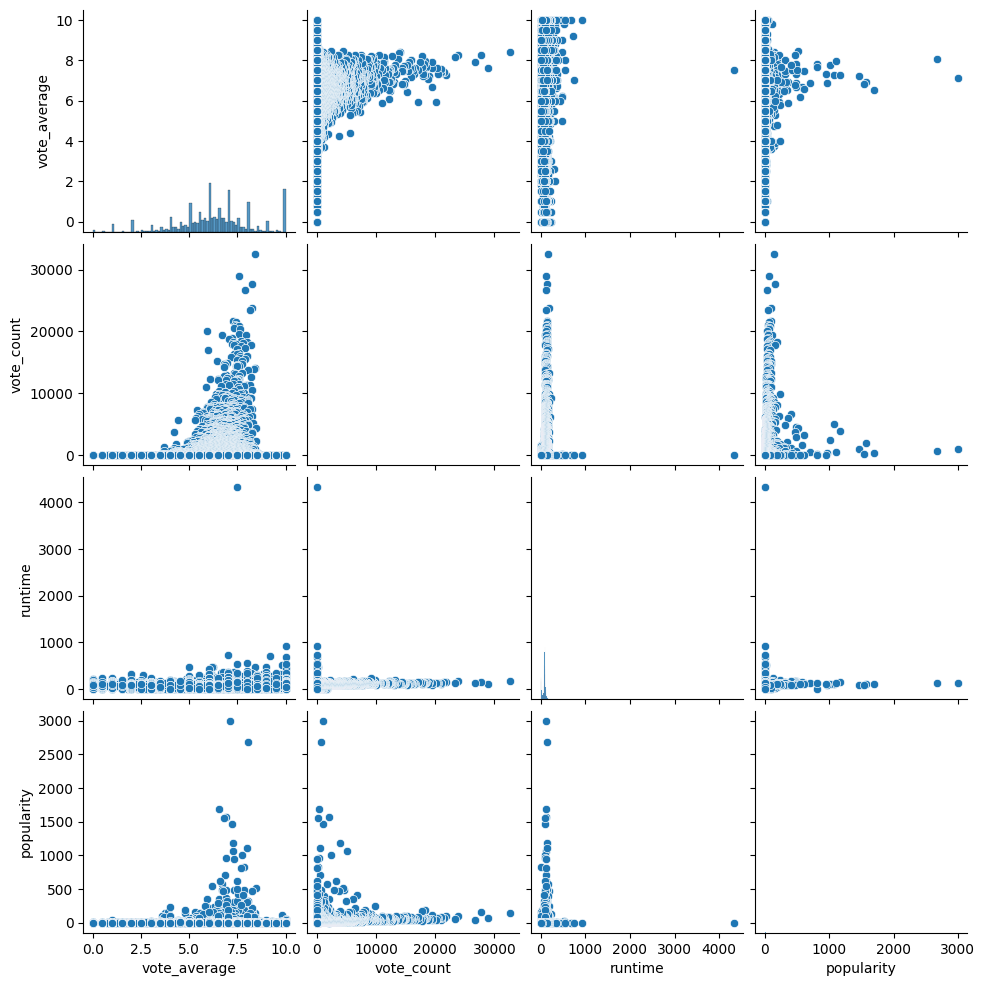

In [70]:
# Pairplot
sns.pairplot(df[['vote_average', 'vote_count', 'runtime', 'popularity']])

###7.Add 'Continent' Column###

In [71]:
# Add continent
def get_continent(countries):
    continents = {
        'Asia': {'Afghanistan', 'Armenia', 'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyz Republic', "Lao People's Democratic Republic", 'Lebanon', 'Macao', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territory', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'},
        'Africa': {'Algeria', 'Botswana', 'Cameroon', 'Chad', 'Congo', 'Egypt', 'Eritrea', 'Ethiopia', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Mali', 'Mauritius', 'Morocco', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
        'North America': {'Bahamas', 'Barbados', 'Bermuda', 'Canada', 'Costa Rica', 'Dominican Republic', 'Guatemala', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Puerto Rico', 'St. Kitts and Nevis', 'United States of America'},
        'Oceania' : {'American Samoa', 'Cook Islands', 'French Polynesia', 'Northern Mariana Islands'},
        'South America': {'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica, Nicaragua', 'El Salvador', 'Cuba', 'Ecuador', 'Panama', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'},
        'Antarctica': {'South Georgia and the South Sandwich Islands'},
        'Europe': {'Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Netherlands', 'Northern Ireland', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'},
        'Australia': {'Australia', 'Christmas Island', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu'}
    }
    continent_set = set()
    for country in countries:
        for continent, countries_set in continents.items():
            if country in countries_set:
                continent_set.add(continent)
    return ', '.join(continent_set)

# Map the countries to continent and drop the country column
df['continent'] = df.loc[:,'production_countries'].apply(lambda x: get_continent(x.split(', ')))
df = df.drop('production_countries',axis=1)

In [72]:
def get_dummy(dataframe_name,column_name):
  # Split the column value into list
  data_column = dataframe_name.loc[:,column_name]
  data = list(data_column.apply(lambda x: x.split(',')))
  # Strip blank spaces
  data = [[item.strip() for item in sublist] for sublist in data]
  # Transform data
  te = TransactionEncoder()
  te_data = te.fit(data).transform(data)
  # Create a dataframe from the data
  df_encoded = pd.DataFrame(te_data, columns=te.columns_)
  return(df_encoded)

###8.Get Dummy Variables###

In [73]:
# Get continent dummy
df_continent = get_dummy(df,'continent')
df_continent

,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,False,False,False,True,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
33681,False,False,False,False,True,False,False
33682,False,False,False,True,False,False,False
33683,False,False,False,False,True,False,False
33684,False,False,False,False,True,False,False


In [74]:
# Get genre dummy
df_genres = get_dummy(df,'genres')
df_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
33682,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
33683,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
33684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###9.Normalize Numeric Columns###

In [75]:
# Identify numeric columns
df['year'] = df['year'].astype(str)
df_nor = df.copy()
numeric_cols = df_nor.select_dtypes(include=['number']).columns
numeric_cols

# Normalization model
scaler = StandardScaler()
df_nor[numeric_cols] = scaler.fit_transform(df_nor[numeric_cols])

df_nor

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent
0,Interstellar,1.117892,29.446152,Released,1.983656,False,en,The adventures of a group of explorers who mak...,3.723016,"Adventure, Drama, Science Fiction",2014,11,"Europe, North America"
1,Deadpool,0.691416,26.102602,Released,0.713952,False,en,The origin story of former Special Forces oper...,1.855098,"Action, Adventure, Comedy",2016,02,North America
2,Avengers: Infinity War,1.032702,25.028701,Released,1.567360,False,en,As the Avengers and their allies have continue...,4.113141,"Adventure, Action, Science Fiction",2018,04,North America
3,Guardians of the Galaxy,0.849176,24.051187,Released,0.984545,False,en,"Light years from Earth, 26 years after being a...",0.762671,"Action, Science Fiction, Adventure",2014,07,North America
4,Avengers: Endgame,1.036909,21.522383,Released,2.233433,False,en,After the devastating events of Avengers: Infi...,2.381417,"Adventure, Science Fiction, Action",2019,04,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,Marital Rape Is Real,1.950336,-0.170232,Released,-1.409158,False,en,Marital Rape Is Real is a short film adapted f...,-0.140906,Drama,2016,04,North America
33682,Baffi Bamboleo: Deviance Of The Multiverse,1.950336,-0.170232,Released,-0.763899,False,en,"Baffi Bamboleo manages to reach our world, cau...",-0.138526,"Action, Adventure, Comedy, Science Fiction",2022,12,Europe
33683,Bubble Gum Girls,0.372742,-0.170232,Released,1.275952,True,en,Embark on a journey with five strikingly beaut...,-0.137945,Fantasy,2014,11,North America
33684,Escapade,1.950336,-0.170232,Released,-0.826343,True,en,"Everywhere she goes, Eva attracts so much atte...",-0.157508,Action,2022,02,North America


###10.Get Final Dataset###

In [76]:
# Merge dummy genres and continents back to normalized df
df_nor = df_nor.merge(df_genres, how='outer',left_index=True,right_index=True)
df_nor = df_nor.merge(df_continent, how='outer',left_index=True,right_index=True)
df_nor

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,Interstellar,1.117892,29.446152,Released,1.983656,False,en,The adventures of a group of explorers who mak...,3.723016,"Adventure, Drama, Science Fiction",...,False,False,False,False,False,False,True,True,False,False
1,Deadpool,0.691416,26.102602,Released,0.713952,False,en,The origin story of former Special Forces oper...,1.855098,"Action, Adventure, Comedy",...,False,False,False,False,False,False,False,True,False,False
2,Avengers: Infinity War,1.032702,25.028701,Released,1.567360,False,en,As the Avengers and their allies have continue...,4.113141,"Adventure, Action, Science Fiction",...,False,False,False,False,False,False,False,True,False,False
3,Guardians of the Galaxy,0.849176,24.051187,Released,0.984545,False,en,"Light years from Earth, 26 years after being a...",0.762671,"Action, Science Fiction, Adventure",...,False,False,False,False,False,False,False,True,False,False
4,Avengers: Endgame,1.036909,21.522383,Released,2.233433,False,en,After the devastating events of Avengers: Infi...,2.381417,"Adventure, Science Fiction, Action",...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,Marital Rape Is Real,1.950336,-0.170232,Released,-1.409158,False,en,Marital Rape Is Real is a short film adapted f...,-0.140906,Drama,...,False,False,False,False,False,False,False,True,False,False
33682,Baffi Bamboleo: Deviance Of The Multiverse,1.950336,-0.170232,Released,-0.763899,False,en,"Baffi Bamboleo manages to reach our world, cau...",-0.138526,"Action, Adventure, Comedy, Science Fiction",...,False,False,False,False,False,False,True,False,False,False
33683,Bubble Gum Girls,0.372742,-0.170232,Released,1.275952,True,en,Embark on a journey with five strikingly beaut...,-0.137945,Fantasy,...,False,False,False,False,False,False,False,True,False,False
33684,Escapade,1.950336,-0.170232,Released,-0.826343,True,en,"Everywhere she goes, Eva attracts so much atte...",-0.157508,Action,...,False,False,False,False,False,False,False,True,False,False


In [77]:
# Replace True with 1, False with 0
df_nor = df_nor.replace({True: 1, False: 0})
df_nor

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,Interstellar,1.117892,29.446152,Released,1.983656,0,en,The adventures of a group of explorers who mak...,3.723016,"Adventure, Drama, Science Fiction",...,0,0,0,0,0,0,1,1,0,0
1,Deadpool,0.691416,26.102602,Released,0.713952,0,en,The origin story of former Special Forces oper...,1.855098,"Action, Adventure, Comedy",...,0,0,0,0,0,0,0,1,0,0
2,Avengers: Infinity War,1.032702,25.028701,Released,1.567360,0,en,As the Avengers and their allies have continue...,4.113141,"Adventure, Action, Science Fiction",...,0,0,0,0,0,0,0,1,0,0
3,Guardians of the Galaxy,0.849176,24.051187,Released,0.984545,0,en,"Light years from Earth, 26 years after being a...",0.762671,"Action, Science Fiction, Adventure",...,0,0,0,0,0,0,0,1,0,0
4,Avengers: Endgame,1.036909,21.522383,Released,2.233433,0,en,After the devastating events of Avengers: Infi...,2.381417,"Adventure, Science Fiction, Action",...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,Marital Rape Is Real,1.950336,-0.170232,Released,-1.409158,0,en,Marital Rape Is Real is a short film adapted f...,-0.140906,Drama,...,0,0,0,0,0,0,0,1,0,0
33682,Baffi Bamboleo: Deviance Of The Multiverse,1.950336,-0.170232,Released,-0.763899,0,en,"Baffi Bamboleo manages to reach our world, cau...",-0.138526,"Action, Adventure, Comedy, Science Fiction",...,0,0,0,0,0,0,1,0,0,0
33683,Bubble Gum Girls,0.372742,-0.170232,Released,1.275952,1,en,Embark on a journey with five strikingly beaut...,-0.137945,Fantasy,...,0,0,0,0,0,0,0,1,0,0
33684,Escapade,1.950336,-0.170232,Released,-0.826343,1,en,"Everywhere she goes, Eva attracts so much atte...",-0.157508,Action,...,0,0,0,0,0,0,0,1,0,0


##****Data Analysis****##

In [78]:
df_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              33686 non-null  object 
 1   vote_average       33686 non-null  float64
 2   vote_count         33686 non-null  float64
 3   status             33686 non-null  object 
 4   runtime            33686 non-null  float64
 5   adult              33686 non-null  int64  
 6   original_language  33686 non-null  object 
 7   overview           33686 non-null  object 
 8   popularity         33686 non-null  float64
 9   genres             33686 non-null  object 
 10  year               33686 non-null  object 
 11  month              33686 non-null  object 
 12  continent          33686 non-null  object 
 13  Action             33686 non-null  int64  
 14  Adventure          33686 non-null  int64  
 15  Animation          33686 non-null  int64  
 16  Comedy             336

In [79]:
# Get numeric columns
numeric_cols = df_nor.select_dtypes(include=['number']).columns
numeric_cols

Index(['vote_average', 'vote_count', 'runtime', 'adult', 'popularity',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Africa', 'Asia', 'Australia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [80]:
df_num = df_nor[numeric_cols]
df_num

,vote_average,vote_count,runtime,adult,popularity,Action,Adventure,Animation,Comedy,Crime,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,1.117892,29.446152,1.983656,0,3.723016,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.691416,26.102602,0.713952,0,1.855098,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.032702,25.028701,1.567360,0,4.113141,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.849176,24.051187,0.984545,0,0.762671,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.036909,21.522383,2.233433,0,2.381417,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,1.950336,-0.170232,-1.409158,0,-0.140906,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33682,1.950336,-0.170232,-0.763899,0,-0.138526,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
33683,0.372742,-0.170232,1.275952,1,-0.137945,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33684,1.950336,-0.170232,-0.826343,1,-0.157508,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


###1.Principal Component Analysis###

In [81]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_num)

PCA()

In [82]:
transformed_data_df = pca.transform(df_num)

transformed_data_df.shape

(33686, 31)

In [83]:
# Cumulative explained variance percentage
import numpy as np
import plotly.express as px
cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)
px.line(cum_var_exp)

In [84]:
# Create a DataFrame containing the transformed data
df_pca= pd.DataFrame(pca2,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,22.252004,-4.591008,-1.413810,-19.040821,1.736391,0.235222,-0.026391,-1.220734,0.535172
1,18.422020,-4.019297,-1.274416,-18.076321,0.714334,0.908650,0.766685,-0.592281,0.153263
2,19.472378,-4.118969,-1.831875,-15.702377,0.909995,0.992270,0.006145,-0.718987,0.210427
3,16.623300,-3.631358,-0.317650,-17.058962,0.777127,0.950102,-0.041687,-0.630477,0.133251
4,16.537411,-3.160147,-0.232063,-13.848598,0.744543,0.885246,-0.000893,-0.499733,0.189247
...,...,...,...,...,...,...,...,...,...
33681,-0.748648,-2.220594,-0.076710,-0.066467,-0.619418,-0.626827,-0.394718,-0.358332,0.225778
33682,-0.410485,-2.062483,0.272384,0.057910,0.557288,-0.328617,0.733706,0.846999,-0.272528
33683,0.479723,0.238688,1.135788,0.519685,-0.307967,0.216659,-0.013671,0.120734,0.139710
33684,-0.427547,-1.994355,0.334958,0.109621,-0.564930,0.119955,-0.231987,0.201050,-0.109768


###2.K-means Clustering###

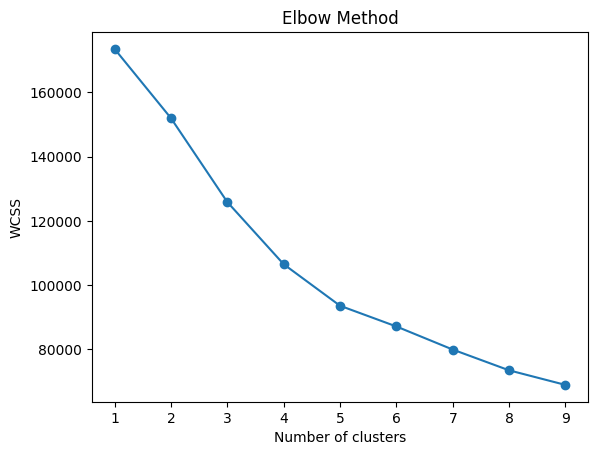

In [85]:
# Use Elbow method to find proper number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
# result is 5
num_clusters = 5
kmeans_result = KMeans(num_clusters,init='random',random_state=42).fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [87]:
df_kmeans = df.copy()
df_kmeans['cluster_labels']=kmeans_result.labels_
df_kmeans

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent,cluster_labels
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",2014,11,"Europe, North America",2
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",2016,02,North America,2
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",2018,04,North America,2
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",2014,07,North America,2
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",2019,04,North America,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,Marital Rape Is Real,10.000,1,Released,6,False,en,Marital Rape Is Real is a short film adapted f...,0.600,Drama,2016,04,North America,0
33682,Baffi Bamboleo: Deviance Of The Multiverse,10.000,1,Released,37,False,en,"Baffi Bamboleo manages to reach our world, cau...",0.686,"Action, Adventure, Comedy, Science Fiction",2022,12,Europe,0
33683,Bubble Gum Girls,7.000,1,Released,135,True,en,Embark on a journey with five strikingly beaut...,0.707,Fantasy,2014,11,North America,3
33684,Escapade,10.000,1,Released,34,True,en,"Everywhere she goes, Eva attracts so much atte...",0.000,Action,2022,02,North America,0


In [88]:
df_kmeans['cluster_labels'].value_counts()

3    12991
1     7460
0     7107
4     5770
2      358
Name: cluster_labels, dtype: int64

In [89]:
# Check information of each cluster
for i in range(0,5):
  df_cluster = df_kmeans[df_kmeans['cluster_labels']==i]
  print(f'cluster{i}')
  display(df_cluster.describe())

cluster0


,vote_average,vote_count,runtime,popularity,cluster_labels
count,7107.000000,7107.000000,7107.000000,7107.000000,7107.0
mean,7.403175,10.819614,14.590967,1.406871,0.0
std,1.635452,63.550374,12.056065,4.114934,0.0
min,4.500000,1.000000,1.000000,0.000000,0.0
25%,6.000000,1.000000,6.000000,0.600000,0.0
50%,7.000000,1.000000,11.000000,0.619000,0.0
75%,8.700000,4.000000,18.000000,1.053000,0.0
max,10.000000,1737.000000,65.000000,153.721000,0.0


cluster1


,vote_average,vote_count,runtime,popularity,cluster_labels
count,7460.000000,7460.000000,7460.000000,7460.000000,7460.0
mean,7.724047,17.807105,88.690483,2.106977,1.0
std,1.301214,77.202300,30.781004,3.534610,0.0
min,5.000000,1.000000,29.000000,0.000000,1.0
25%,6.800000,1.000000,71.750000,0.670000,1.0
50%,7.500000,3.000000,87.000000,1.232000,1.0
75%,8.500000,9.000000,99.000000,2.182000,1.0
max,10.000000,3084.000000,481.000000,111.252000,1.0


cluster2


,vote_average,vote_count,runtime,popularity,cluster_labels
count,358.000000,358.000000,358.000000,358.000000,358.0
mean,7.107232,8662.874302,133.298883,132.249036,2.0
std,0.666933,5165.542843,222.908223,308.552690,0.0
min,4.414000,6.000000,9.000000,1.038000,2.0
25%,6.679750,5611.750000,107.000000,32.461750,2.0
50%,7.171500,7324.500000,119.500000,47.579000,2.0
75%,7.593500,10929.500000,133.000000,79.379500,2.0
max,8.442000,32571.000000,4320.000000,2994.357000,2.0


cluster3


,vote_average,vote_count,runtime,popularity,cluster_labels
count,12991.000000,12991.000000,12991.000000,12991.000000,12991.0
mean,6.107416,227.676699,97.359634,8.186380,3.0
std,0.810738,606.400744,28.536844,16.570531,0.0
min,2.000000,1.000000,40.000000,0.000000,3.0
25%,5.500000,5.000000,85.000000,1.892500,3.0
50%,6.000000,21.000000,92.000000,3.814000,3.0
75%,6.682500,113.000000,103.000000,9.153500,3.0
max,10.000000,5122.000000,923.000000,359.237000,3.0


cluster4


,vote_average,vote_count,runtime,popularity,cluster_labels
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.0
mean,3.432096,12.342114,70.156326,2.138531,4.0
std,1.285613,49.020828,32.809548,4.446925,0.0
min,0.000000,1.000000,1.000000,0.000000,4.0
25%,2.500000,1.000000,55.250000,0.674000,4.0
50%,4.000000,3.000000,81.000000,1.302000,4.0
75%,4.400000,8.000000,90.000000,2.322500,4.0
max,5.700000,1839.000000,235.000000,158.795000,4.0


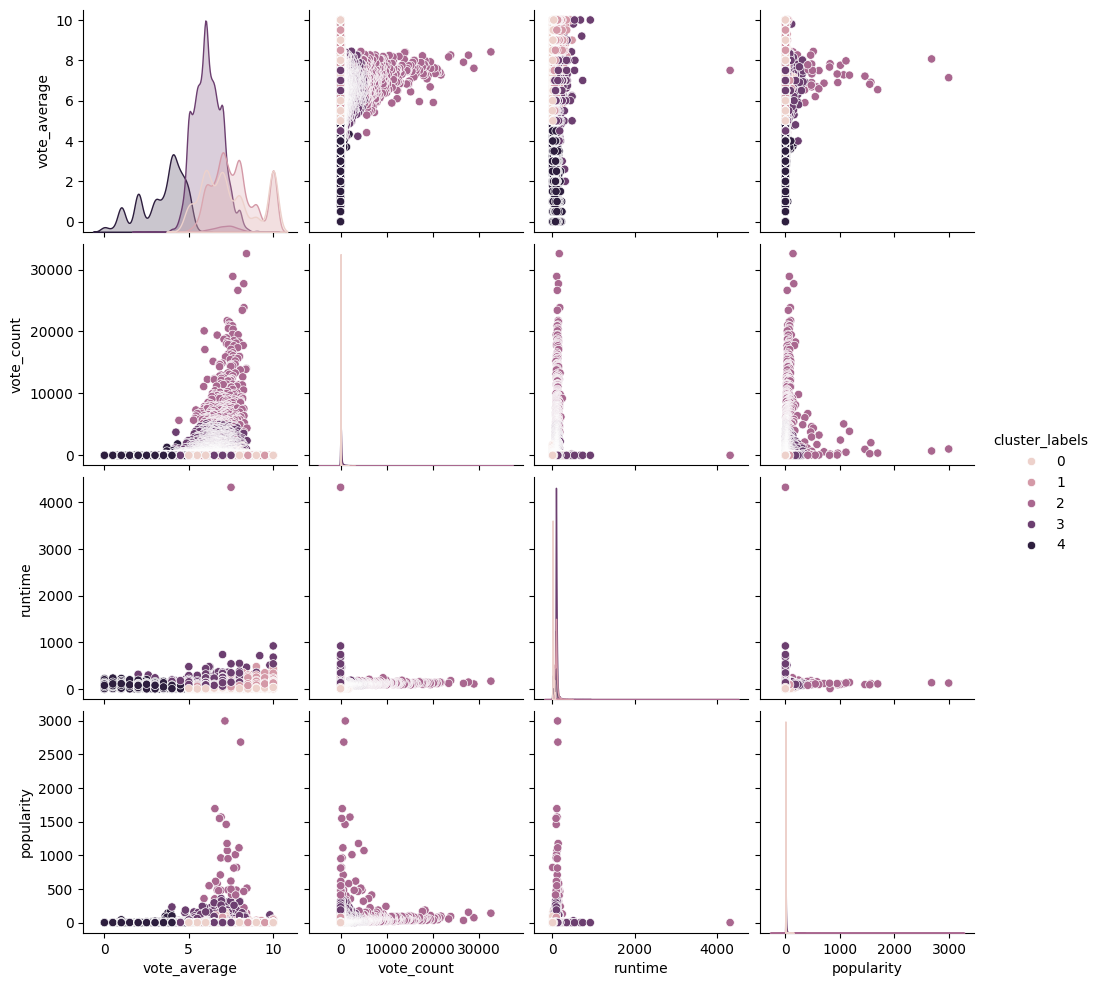

In [90]:
# Pairplot after clustering
sns.pairplot(df_kmeans[['vote_average', 'vote_count', 'runtime', 'popularity', 'cluster_labels']], hue='cluster_labels')


##****Next Step****##

###1.NLP preprocessing###

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              33686 non-null  object 
 1   vote_average       33686 non-null  float64
 2   vote_count         33686 non-null  int64  
 3   status             33686 non-null  object 
 4   runtime            33686 non-null  int64  
 5   adult              33686 non-null  bool   
 6   original_language  33686 non-null  object 
 7   overview           33686 non-null  object 
 8   popularity         33686 non-null  float64
 9   genres             33686 non-null  object 
 10  year               33686 non-null  object 
 11  month              33686 non-null  object 
 12  continent          33686 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 3.1+ MB


In [92]:
# Overview text preprocessing, remove '\n' , to lower case and remove non-alphsbetic values
df.overview = df.overview.str.strip()
df.overview = df.overview.str.lower()
df.overview = df.overview.str.replace('[^A-Za-z0-9\s]+','')


<ipython-input-92-4b54100ec865>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [93]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
# Define a preprocessing function
def process_text(text):
  tokens = word_tokenize(text)
  tokens_remove_stop = [word for word in tokens if word not in stop_words]
#  result = [stemmer.stem(word) for word in tokens_remove_stop]
  result = [lemmatizer.lemmatize(word) for word in tokens_remove_stop]
  return result

###2.1 Bag of Words###

In [95]:
# Build a BoW model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer= process_text)
bow_transformed = cv.fit_transform(df.overview)
bow_df = pd.DataFrame(bow_transformed.toarray(), columns=cv.get_feature_names_out())
bow_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



,0,000,007,009,00s,01,01112012,0119,013,01band,...,zummer,zurab,zurich,zuris,zvi,zwink,zydrunas,zygmunt,zygote,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###2.2 TF-IDF###

In [96]:
# Build a TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_model = TfidfVectorizer(tokenizer = process_text, norm=None)
tfidf_model.fit(df.overview)
tfidf_transformed = tfidf_model.transform(df.overview)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [97]:
tfidf_transformed.shape

(33686, 54687)

In [98]:
# Define the movie_recommendation function
def movie_recommendation(movie_id):
  movie_vector = tfidf_model.transform([df.overview.iloc[movie_id]])
  cos_sim = pd.DataFrame(cosine_similarity(movie_vector, tfidf_transformed))
  top_five = cos_sim.sort_values(by=0,axis=1,ascending = False).iloc[:,1:6]
  top_five_id = list(top_five.columns)
  movie_list = []
  for id in top_five_id:
    movie_list.append(df.title.iloc[id])
  return movie_list

In [99]:
# Test the model with movie_id = 2
movie_id = 2
print('The movie is: ',df.title.iloc[movie_id])
movie_recommendation(movie_id)

The movie is:  Avengers: Infinity War


['Avengers: Endgame',
 'LEGO Marvel Super Heroes: Guardians of the Galaxy - The Thanos Threat',
 'LEGO Marvel Avengers: Time Twisted',
 'LEGO Marvel Super Heroes: Black Panther - Trouble in Wakanda',
 'Avengers Grimm: Time Wars']

###2.3 Word2Vec###

In [100]:
# Build the Word2Vec model
from gensim.models import Word2Vec

word2vec_tokenized = [process_text(sentence) for sentence in df.overview]

model_word2vec = Word2Vec(sentences=word2vec_tokenized, vector_size=300, window=2, min_count=1, workers=4, epochs=50)
model_word2vec = model_word2vec.wv

In [101]:
# Define the word embedding function
def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

In [102]:
# Generate the embeddings for each overview
embeddings = []
for tokenized_document in word2vec_tokenized:
  message_word_embeddings = [get_word_embedding(word, model_word2vec) for word in tokenized_document ]
  message_embedding = np.mean(message_word_embeddings if len(message_word_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [message_embedding]

embeddings = np.array(embeddings)

In [103]:
embeddings.shape

(33686, 300)

In [104]:
# Define the movie recommendation function
def movie_recommendation(movie_id,embeddings):
  movie_embedding = embeddings[movie_id].reshape(1, -1)
  cos_sim = pd.DataFrame(cosine_similarity(movie_embedding, embeddings))
  top_five = cos_sim.sort_values(by=0,axis=1,ascending = False).iloc[:,1:6]
  top_five_id = list(top_five.columns)
  movie_list = []
  for id in top_five_id:
    movie_list.append(df.title.iloc[id])
  return movie_list

In [105]:
# Test the model with movie_id = 2
movie_id = 2
print('The movie is: ',df.title.iloc[movie_id])
movie_recommendation(movie_id,embeddings)

The movie is:  Avengers: Infinity War


['Creators: The Past',
 'Freedom Fighters: The Ray',
 'Transformers: Rise of the Beasts',
 'God of Thunder',
 'Iron Sky: The Coming Race']